# Processing the Dataset

In [1]:
import contractions
import re
import json
import nltk
import matplotlib.pyplot as plt
nltk.download('stopwords')
from nltk.corpus import stopwords
# create a tokenization function
def tokenize(text):
    text = contractions.fix(text)
    tokens = re.findall(r'[A-Za-z]+', text)
    tokens = list(map(str.lower, tokens))
    return tokens

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/maximiliandittgen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# load the json
data_filepath = "merged_data_without_photos.json"
with open(data_filepath, 'r') as file:
    data = json.load(file)


# tokenize the dataset
wikitravel = {}

for city in list(data.keys()):
    wikitravel[city] = {}
    for activity in list(data[city]["wikitravel"].keys()):
        toks = tokenize(data[city]["wikitravel"][activity])

        #remove stop words
        filtered_toks = [tok for tok in toks if not tok in set(stopwords.words('english'))]

        wikitravel[city][activity] = filtered_toks

print(wikitravel["New York City"]["Eat"])

['new', 'york', 'might', 'expect', 'big', 'apple', 'eating', 'options', 'covered', 'find', 'almost', 'every', 'type', 'food', 'available', 'every', 'cuisine', 'world', 'represented', 'tens', 'thousands', 'restaurants', 'suit', 'tastes', 'budgets', 'ranging', 'dingy', 'slice', 'pizza', 'joints', 'plate', 'prix', 'fixe', 'sushi', 'exclusive', 'michelin', 'starred', 'eateries', 'thousands', 'delis', 'bodegas', 'grocery', 'stores', 'dot', 'every', 'corner', 'city', 'diy', 'meals', 'easy', 'cheap', 'find', 'street', 'food', 'comes', 'various', 'tastes', 'ranging', 'ubiquitous', 'new', 'york', 'hot', 'dog', 'vendors', 'many', 'carts', 'greek', 'cuisine', 'street', 'corners', 'mid', 'town', 'however', 'midtown', 'wary', 'restaurants', 'bars', 'immediately', 'around', 'times', 'square', 'within', 'theater', 'district', 'near', 'empire', 'state', 'building', 'many', 'tourist', 'traps', 'cashing', 'travelers', 'gullibility', 'lack', 'local', 'knowledge', 'new', 'yorkers', 'would', 'dream', 'eati

In [3]:
from collections import Counter

def word_concentration(dataset):
    # Initialize dictionaries to store word counts for each section
    eat_words = []
    do_words = []
    buy_words = []
    see_words = []

    # Extract words from each city and section
    for city_data in wikitravel.values():
        eat_words.extend(city_data.get("Eat", []))
        do_words.extend(city_data.get("Do", []))
        buy_words.extend(city_data.get("Buy", []))
        see_words.extend(city_data.get("See", []))

    # Count occurrences of each word for each section
    eat_counts = Counter(eat_words)
    do_counts = Counter(do_words)
    buy_counts = Counter(buy_words)
    see_counts = Counter(see_words)

    # Get the 5 most common words for each section
    most_common_eat = eat_counts.most_common(6)
    most_common_do = do_counts.most_common(6)
    most_common_buy = buy_counts.most_common(5)
    most_common_see = see_counts.most_common(5)

    # Print the results for each section
    print("The 5 most common words in the 'Eat' section:")
    for word, count in most_common_eat:
        if word == "x":
            continue
        print(f"{word}: {count}")

    print("\nThe 5 most common words in the 'Do' section:")
    for word, count in most_common_do:
        if word == "x":
            continue
        print(f"{word}: {count}")

    print("\nThe 5 most common words in the 'Buy' section:")
    for word, count in most_common_buy:
        if word == "x":
            continue
        print(f"{word}: {count}")
    
    print("\nThe 5 most common words in the 'See' section:")
    for word, count in most_common_see:
        if word == "x":
            continue
        print(f"{word}: {count}")

word_concentration(wikitravel)

The 5 most common words in the 'Eat' section:
food: 2058
restaurant: 1691
restaurants: 1029
good: 836
also: 743

The 5 most common words in the 'Do' section:
city: 878
one: 621
also: 591
festival: 573
edit: 557

The 5 most common words in the 'Buy' section:
shopping: 807
market: 597
shops: 594
also: 535
street: 509

The 5 most common words in the 'See' section:
museum: 2020
city: 1189
one: 884
park: 830
also: 819


In [5]:
# Analysis 1: Show which cities are best for different kinds of foods based on concentration of mentions
def word_concentration(data, target_words, activity):
    result = []
    
    for city, activities in data.items():
        words = activities.get(activity, [])  # Get the list of words for the specified activity
        
        if not words:
            continue  # Skip cities without the specified activity
        
        # Calculate the proportion of words in the activity list that match the target word
        word_count = sum(words.count(word) for word in target_words)
        total_words = len(words)
        proportion = (word_count) / (total_words + 1) #add 1 to avoid divide by 0
        
        result.append((city, proportion))
    result.sort(key=lambda x: x[1], reverse=True)

    # Normalize proportions to be between 0 and 1
    max_proportion = max(result, key=lambda x: x[1])[1]
    min_proportion = min(result, key=lambda x: x[1])[1]
    range_proportion = max_proportion - min_proportion
    
    if range_proportion == 0:
        # Avoid division by zero if all proportions are the same
        range_proportion = 1
    
    normalized_result = [(city, (proportion - min_proportion) / range_proportion) for city, proportion in result]
    return normalized_result

dumpling = word_concentration(wikitravel, ["dumpling", "dumplings"], "Eat")
bagel = word_concentration(wikitravel, ["bagel", "bagels"], "Eat")
fruit = word_concentration(wikitravel, ["fruit", "fruits"], "Eat")
seafood = word_concentration(wikitravel, ["seafood", "fish"], "Eat")
cake = word_concentration(wikitravel, ["cake", "cakes"], "Eat")

exercise = word_concentration(wikitravel, ["hike", "bike", "walk", "trek", "jog", "run", "adventure"], "Do")
relax = word_concentration(wikitravel, ["relax", "lounge", "rest", "sit"], "Do")
print(exercise)

[('Luanda', 1.0), ('Prague', 0.6779661016949152), ('Honiara', 0.6774193548387097), ('Funafuti', 0.6), ('Wellington', 0.5133333333333334), ('Mecca', 0.4772727272727273), ('Hyderabad', 0.46666666666666673), ('Kathmandu', 0.4294478527607362), ('Podgorica', 0.38181818181818183), ('Zagreb', 0.35195530726256985), ('Tbilisi', 0.33070866141732286), ('Dammam', 0.30434782608695654), ('Pune', 0.2916666666666667), ('Suva', 0.2916666666666667), ('Christchurch', 0.2884615384615385), ('Tashkent', 0.2837837837837838), ('Bogota', 0.268370607028754), ('Abuja', 0.2530120481927711), ('Almaty', 0.24454148471615722), ('Noumea', 0.23863636363636365), ('Izmir', 0.23595505617977527), ('Bangkok', 0.2282608695652174), ('Canberra', 0.2278481012658228), ('Oslo', 0.2210526315789474), ('Muscat', 0.21875), ('Seoul', 0.21273516642547033), ('Sofia', 0.207663782447466), ('Beirut', 0.2074074074074074), ('Perth', 0.2058823529411765), ('Zurich', 0.20554649265905384), ('Apia', 0.20487804878048782), ('Shanghai', 0.1944444444

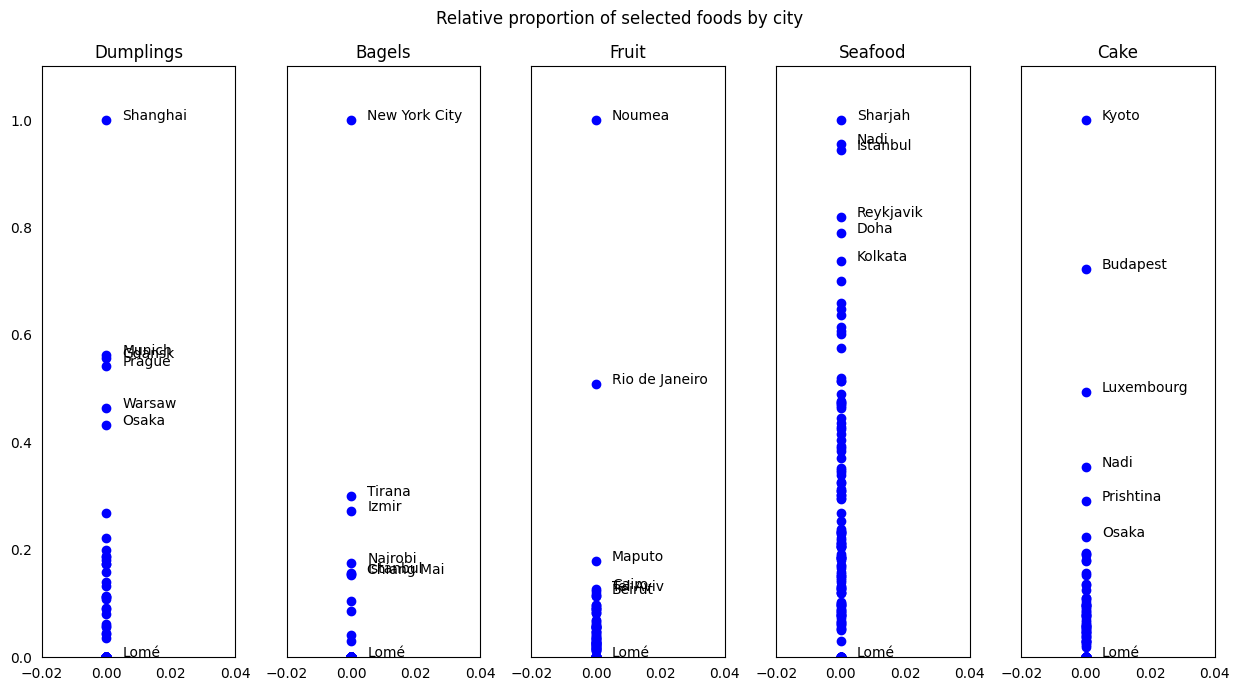

In [6]:
# plot
def plot_foods(food_data):
    # Create the plot
    fig, ax = plt.subplots(1, len(food_data), figsize=(2.5 * len(food_data), 7), sharey=True)
    
    # Iterate through each food and plot its city proportions
    for i, (food, city_proportion) in enumerate(food_data):
        # Extract cities and proportions
        y = [0 for city, _ in city_proportion]
        proportions = [proportion for _, proportion in city_proportion]
        cities = [city for city, _ in city_proportion]
        
        # Plot city proportions for the current food
        ax[i].scatter(y, proportions, color='blue')
        ax[i].set_ylim(0, 1.1)
        ax[i].set_xlim(-.02, .04)
        for j, city in enumerate(cities):
            if j <= 5 or j == (len(cities) - 1):
                ax[i].annotate(city, (y[j] + 0.005, proportions[j]))
        ax[i].set_title(food)
        ax[i].tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)
        
        # # Add text labels for the top and bottom five cities
        # top_cities = sorted(city_proportion, key=lambda x: x[1], reverse=True)[:5]
        # bottom_cities = sorted(city_proportion, key=lambda x: x[1])[:5]
        # for city, proportion in top_cities:
        #     ax[i].text(city, proportion + 0.01, city, ha='center', fontsize=8, color='blue')
        # for city, proportion in bottom_cities:
        #     ax[i].text(city, proportion - 0.03, city, ha='center', fontsize=8, color='red')
    fig.suptitle("Relative proportion of selected foods by city")
    plt.tight_layout()
    plt.show()

food_data = [
    ("Dumplings", dumpling), 
    ("Bagels", bagel), 
    ("Fruit", fruit), 
    ("Seafood", seafood), 
    ("Cake", cake)
]

plot_foods(food_data)

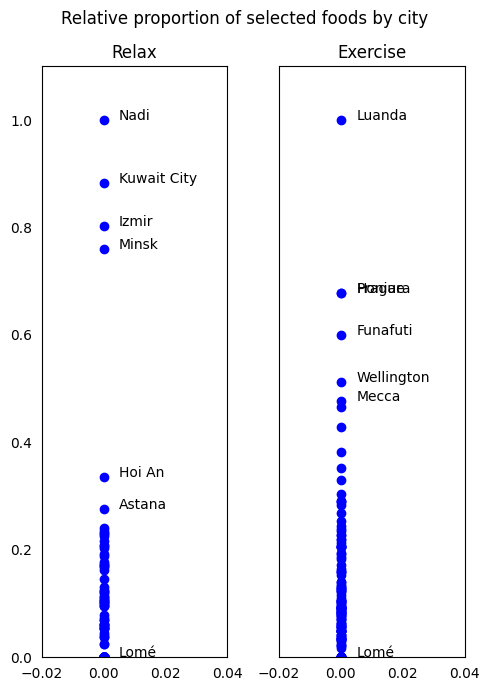

In [7]:
# plot
def plot_activities(food_data):
    # Create the plot
    fig, ax = plt.subplots(1, len(food_data), figsize=(2.5 * len(food_data), 7), sharey=True)
    
    # Iterate through each food and plot its city proportions
    for i, (food, city_proportion) in enumerate(food_data):
        # Extract cities and proportions
        y = [0 for city, _ in city_proportion]
        proportions = [proportion for _, proportion in city_proportion]
        cities = [city for city, _ in city_proportion]
        
        # Plot city proportions for the current food
        ax[i].scatter(y, proportions, color='blue')
        ax[i].set_ylim(0, 1.1)
        ax[i].set_xlim(-.02, .04)
        for j, city in enumerate(cities):
            if j <= 5 or j == (len(cities) - 1):
                ax[i].annotate(city, (y[j] + 0.005, proportions[j]))
        ax[i].set_title(food)
        ax[i].tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)
        
        # # Add text labels for the top and bottom five cities
        # top_cities = sorted(city_proportion, key=lambda x: x[1], reverse=True)[:5]
        # bottom_cities = sorted(city_proportion, key=lambda x: x[1])[:5]
        # for city, proportion in top_cities:
        #     ax[i].text(city, proportion + 0.01, city, ha='center', fontsize=8, color='blue')
        # for city, proportion in bottom_cities:
        #     ax[i].text(city, proportion - 0.03, city, ha='center', fontsize=8, color='red')
    fig.suptitle("Relative proportion of selected activity by city")
    plt.tight_layout()
    plt.show()

food_data = [
    ("Relax", relax), 
    ("Exercise", exercise)
]

plot_foods(food_data)